In [ ]:
import datetime
import random
import matplotlib.pyplot as plt



# Classe pour un avion
class Avion:
    def __init__(self, code, stockage, etat, date_de_fabrication, nombres_de_vols, piste):
        self.code = code
        self.stockage = stockage
        self.etat = etat
        self.date_de_fabrication = date_de_fabrication
        self.nombres_de_vols = nombres_de_vols
        self.piste = piste
        self.vol = None  # Vol actuel de l'avion

# Structure de maillon pour la liste chaînée
class Maillon:
    def __init__(self, avion):
        self.avion = avion
        self.suivant = None

    # Méthode pour calculer la longueur de la liste chaînée
    def longueur(self):
        if self.suivant is None:
            return 1
        else:
            return 1 + self.suivant.longueur()

# Classe pour représenter un vol
class Vol:
    def __init__(self, numero, destination, heure_depart, heure_arrivee):
        self.numero = numero
        self.destination = destination
        self.heure_depart = heure_depart
        self.heure_arrivee = heure_arrivee
        self.heure_depart_prevue = heure_depart  # Heure de départ initialement prévue


# Fonction pour afficher le menu
def afficher_menu():
    print("\nMenu :\n")
    print("1. Ajouter un avion")
    print("2. Supprimer un avion")
    print("3. Ajouter un vol")
    print("4. Gérer les départs")
    print("5. Afficher les vols")
    print("6. Afficher la liste des avions")
    print("7. Générer et afficher les retards ")
    print("8. afficher_influence_passagers")
    print("afficher_influence_passagers")

# Fonction pour ajouter un avion à la liste
def ajouter_avion(tete, capacite_aeroport):
    # Vérifier la capacité maximale de l'aéroport
    if tete is None or tete.longueur() < capacite_aeroport:
        code = input("Entrez le code de l'avion : ")
        stockage = int(input("Entrez la capacité de stockage de l'avion : "))
        etat = input("Entrez l'état de l'avion : ")
        date_de_fabrication = input("Entrez la date de fabrication de l'avion (jj/mm/aaaa) : ")
        nombres_de_vols = int(input("Entrez le nombre de vols de l'avion : "))
        piste = int(input("Entrez le numéro de la piste de l'avion : "))
        nouvel_avion = Avion(code, stockage, etat, date_de_fabrication, nombres_de_vols, piste)
        if tete is None:
            tete = Maillon(nouvel_avion)
        else:
            dernier = tete
            while dernier.suivant:
                dernier = dernier.suivant
            dernier.suivant = Maillon(nouvel_avion)
        print("Avion ajouté avec succès.")
    else:
        print("La capacité maximale de l'aéroport est atteinte. L'avion est en attente.")
    return tete

# Fonction pour ajouter un vol à la liste
def ajouter_vol(vols):

    numero = input("Entrez le numéro du vol : ")

    mouvement = input("Le vol est-il entrant ou sortant ? ").lower()

    if mouvement == "sortant":

        destination = input("Entrez la destination du vol : ")

        heure_depart = input("Entrez l'heure de départ du vol (HH:MM) : ")

        heure_arrivee = input("Entrez l'heure d'arrivée du vol (HH:MM) : ")

        vol = Vol(numero, destination, heure_depart, heure_arrivee)

        vols.append(vol)

        print("Vol sortant ajouté avec succès.")

    elif mouvement == "entrant":

        destination = input("D'où vient le vol ? ")

        heure_depart = input("Entrez l'heure de départ du vol (HH:MM) : ")

        heure_arrivee = input("Entrez l'heure d'arrivée du vol (HH:MM) : ")

        vol = Vol(numero, destination, heure_depart, heure_arrivee)

        vols.append(vol)

        print("Vol entrant ajouté avec succès.")

    else:

        print("Mouvement invalide.")

 

# Fonction pour gérer les départs des avions
def gerer_departs(tete, vols):
    print("\nListe des vols disponibles :\n")
    for i, vol in enumerate(vols, start=1):
        print(f"{i}. Vol {vol.numero} pour {vol.destination} - Départ à {vol.heure_depart}")
    choix = int(input("Entrez le numéro du vol à attribuer à un avion : "))
    if 1 <= choix <= len(vols):
        vol_selectionne = vols[choix - 1]
        code_avion = input("Entrez le code de l'avion concerné : ")
        courant = tete
        while courant:
            if courant.avion.code == code_avion:
                courant.avion.vol = vol_selectionne
                print(f"L'avion {code_avion} est prêt pour le vol {vol_selectionne.numero}.")
                return
            courant = courant.suivant
        else:
            print("Aucun avion trouvé avec ce code.")
    else:
        print("Vol invalide.")


# Fonction pour afficher les vols
def afficher_vols(vols):
    print("\nListe des vols :\n")
    for vol in vols:
        print(f"Vol {vol.numero} pour {vol.destination} - Départ à {vol.heure_depart}")

# Fonction pour afficher la liste des avions
def afficher_liste(tete):
    print("\nListe des avions :\n")
    while tete:
        print(f"Code : {tete.avion.code}, Stockage : {tete.avion.stockage}, Etat : {tete.avion.etat}, "
              f"Date de fabrication : {tete.avion.date_de_fabrication}, Nombre de vols : {tete.avion.nombres_de_vols},"
              f"Piste : {tete.avion.piste}, "
              f"Vol : {tete.avion.vol.numero if tete.avion.vol else 'Aucun'}")
        tete = tete.suivant



def appliquer_retard_avion(vol, retard, tete):
    vols_impactes = []  # Liste pour stocker les vols impactés
    courant = tete
    while courant:
        if courant.avion.vol and courant.avion.vol.destination == vol.destination:
            # Appliquer le même retard à tous les vols suivants avec la même destination
            heure_depart_prevue = datetime.datetime.strptime(courant.avion.vol.heure_depart_prevue, "%H:%M")
            heure_depart_retard = heure_depart_prevue + datetime.timedelta(minutes=retard)
            courant.avion.vol.heure_depart = heure_depart_retard.strftime("%H:%M")
            vols_impactes.append(courant.avion.vol)  # Ajouter le vol impacté à la liste
        courant = courant.suivant
    return vols_impactes

def generer_retard_premier_vol(vols, tete):
    destinations_traitees = set()  # Pour garder une trace des destinations déjà traitées
    for vol in vols:
        if vol.destination not in destinations_traitees:
            retard = random.randint(0, 120)  # Générer un retard aléatoire en minutes
            heure_depart_prevue = datetime.datetime.strptime(vol.heure_depart, "%H:%M")
            heure_depart_retard = heure_depart_prevue + datetime.timedelta(minutes=retard)
            vol.heure_depart = heure_depart_retard.strftime("%H:%M")
            vol.heure_depart_prevue = heure_depart_prevue.strftime("%H:%M")  # Garder une trace de l'heure de départ initialement prévue
            print(f"Vol {vol.numero} pour {vol.destination} - Retard : {retard} minutes")
            destinations_traitees.add(vol.destination)
            
            # Appliquer le retard aux vols suivants de cet avion avec la même destination
            vols_impactes = appliquer_retard_avion(vol, retard, tete)
           
        # Afficher les informations des vols impactés
            if vols_impactes:
                print("\nVols impactés :")
                for v in vols_impactes:
                    print(f" - Vol {v.numero} pour {v.destination} - Départ retardé à {v.heure_depart}")

                    
def generer_retard_premier_vol(vols, tete):
    destinations_traitees = set()  # Pour garder une trace des destinations déjà traitées
    passagers_impactes = {}  # Dictionnaire pour stocker le nombre de passagers impactés par destination
    for vol in vols:
        if vol.destination not in destinations_traitees:
            retard = random.randint(0, 120) + 100  # Générer un retard aléatoire en minutes et l'augmenter de 100
            heure_depart_prevue = datetime.datetime.strptime(vol.heure_depart, "%H:%M")
            heure_depart_retard = heure_depart_prevue + datetime.timedelta(minutes=retard)
            vol.heure_depart = heure_depart_retard.strftime("%H:%M")
            vol.heure_depart_prevue = heure_depart_prevue.strftime("%H:%M")  # Garder une trace de l'heure de départ initialement prévue
            print(f"Vol {vol.numero} pour {vol.destination} - Retard : {retard} minutes")
            destinations_traitees.add(vol.destination)

            # Appliquer le retard aux vols suivants de cet avion avec la même destination
            vols_impactes = appliquer_retard_avion(vol, retard, tete)

            # Collecter le nombre de passagers impactés par destination
            passagers_impactes[vol.destination] = sum(avion.stockage for avion in tete if avion.vol in vols_impactes)

            # Afficher les informations des vols impactés
            if vols_impactes:
                print("\nVols impactés :")
                for v in vols_impactes:
                    print(f" - Vol {v.numero} pour {v.destination} - Départ retardé à {v.heure_depart}")

    # Créer un graphique
    plt.figure(figsize=(10, 6))
    plt.bar(passagers_impactes.keys(), passagers_impactes.values(), color='skyblue')
    plt.xlabel('Destinations')
    plt.ylabel('Nombre de passagers impactés')
    plt.title('Impact des retards sur le nombre de passagers par destination')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Afficher le graphique
    plt.show()

                        

# Fonction pour afficher l'influence des retards sur les passagers
def afficher_influence_passagers(vols):
    destinations = []
    attentes = []
    for vol in vols:
        if vol.heure_depart != vol.heure_depart_prevue:
            destinations.append(vol.destination)
            attente = datetime.datetime.strptime(vol.heure_depart, "%H:%M") - datetime.datetime.strptime(vol.heure_depart_prevue, "%H:%M")
            attentes.append(attente.total_seconds() / 60)  # Convertir en minutes

    plt.figure(figsize=(10, 6))
    plt.bar(destinations, attentes, color='skyblue')
    plt.xlabel('Destinations')
    plt.ylabel('Attente des passagers (minutes)')
    plt.title('Influence des retards sur les passagers par destination')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.show()

    
# Fonction principale
def main():
    # Initialisation des listes des avions et des vols
    tete = None
    vols = []

    # Capacité maximale de l'aéroport
    capacite_aeroport = int(input("Entrez la capacité maximale de l'aéroport : "))

    # Boucle principale du programme
    choix = 0
    while choix != 11:
        afficher_menu()
        choix = int(input("Entrez votre choix : "))
        if choix == 1:
            tete = ajouter_avion(tete, capacite_aeroport)
        elif choix == 2:
            code = input("Entrez le code de l'avion à supprimer : ")
            tete = supprimer_avion(tete, code)
        elif choix == 3:
            ajouter_vol(vols)
        elif choix == 4:
            gerer_departs(tete, vols)
        elif choix == 5:
            afficher_vols(vols)
        elif choix == 6:
            afficher_liste(tete)
        elif choix == 7:
            generer_retard_premier_vol(vols, tete)
        elif choix == 8:
            afficher_influence_passagers(vols)
        else:
            print("Choix invalide. Veuillez réessayer.")

if __name__ == "__main__":
    main()



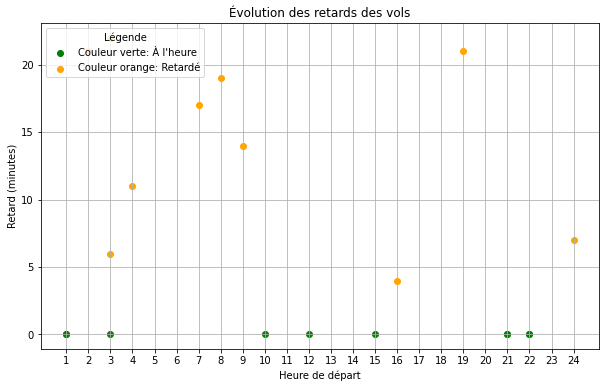

In [1]:
import matplotlib.pyplot as plt
import random

nombre_vols = 20
heures_depart = [random.randint(1, 24) for _ in range(nombre_vols)]
destinations = [random.choice(['Destination 1', 'Destination 2']) for _ in range(nombre_vols)]

# Générer les retards de manière à ce qu'un vol à l'heure soit toujours suivi d'un vol en retard pour la même destination et heure
retards = []
for i in range(nombre_vols):
    retard = random.randint(0, 30) if i % 2 != 0 else 0
    retards.append(retard)

plt.figure(figsize=(10, 6))

# Créer un dictionnaire pour stocker les informations sur les vols retardés par destination et heure
vols_retardes_par_destination_et_heure = {}

# Remplir le dictionnaire avec les données
for i in range(nombre_vols):
    key = (heures_depart[i], destinations[i])
    if key not in vols_retardes_par_destination_et_heure:
        vols_retardes_par_destination_et_heure[key] = []
    vols_retardes_par_destination_et_heure[key].append((i, retards[i]))

# Parcourir le dictionnaire pour tracer les vols sur le graphique
for key, vols in vols_retardes_par_destination_et_heure.items():
    vols.sort(key=lambda x: x[1])  # Trier les vols par retard croissant
    for idx, (vol_index, retard) in enumerate(vols):
        color = 'orange' if retard > 0 else 'green'  # Vols en retard sont en orange, sinon vert
        plt.scatter(key[0], retard, color=color, label='Retardé' if retard > 0 else 'À l\'heure')

plt.xlabel('Heure de départ')
plt.ylabel('Retard (minutes)')
plt.title('Évolution des retards des vols')
plt.xticks(range(1, 25))
plt.grid(True)
plt.legend(title="Légende", loc="upper left", labels=["Couleur verte: À l'heure", "Couleur orange: Retardé"])
plt.show()
